# Task IV: Quantum Generative Adversarial Network (QGAN)


You will explore how best to apply a quantum generative adversarial network (QGAN) to solve a High Energy Data analysis issue, more specifically, separating the signal events from the background events. 

You should use the Google Cirq and Tensorflow Quantum (TFQ) libraries for this task. 

A set of input samples (simulated with Delphes) is provided in NumPy NPZ format [Download Input]. 

In the input file, there are only 100 samples for training and 100 samples for testing so it won’t take much computing resources to accomplish this 
task. The signal events are labeled with 1 while the background events are labeled with 0.


Be sure to show that you understand how to fine tune your machine learning model to improve the performance. The performance can be evaluated with classification accuracy or Area Under ROC Curve (AUC). 


In [1]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [2]:
!pip install tensorflow-quantum==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 KB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

## Implementation of QGAN

In [3]:
import tensorflow as tf
import tensorflow_quantum as tfq

In [4]:

import cirq
import sympy
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [5]:
import numpy as np

# Load the dataset
with np.load('QIS_EXAM_200Events (1).npz', allow_pickle=True) as data:
    train_data = data["training_input"].item()
    test_data = data["test_input"].item()

train_inputs = np.concatenate([train_data[key] for key in train_data.keys()], axis=0)
test_inputs = np.concatenate([test_data[key] for key in test_data.keys()], axis=0)

train_labels = np.concatenate([np.zeros(len(train_data[key])) + int(key) for key in train_data.keys()], axis=0)
test_labels = np.concatenate([np.zeros(len(test_data[key])) + int(key) for key in test_data.keys()], axis=0)

# Sanity check
print(train_inputs.shape, train_labels.shape)
print(test_inputs.shape, test_labels.shape)


(100, 5) (100,)
(100, 5) (100,)


In [6]:
x_train=train_inputs
x_test=test_inputs

In [7]:
y_train=train_labels
y_test=test_labels

In [8]:

# Checking the minimum and maximum value of the features
print("Minimum value of the feature",x_train.min(),"------>", "Maximum value of the feature", x_train.max())
print("Minimum value of the feature",x_test.min(),"------>","Maximum value of the feature", x_test.max())

Minimum value of the feature -0.9999305803064449 ------> Maximum value of the feature 0.9344843617214956
Minimum value of the feature -0.9997083749335067 ------> Maximum value of the feature 0.934061853011746


In [9]:
# convert label format from 1/0 to 1/-1
y_train = tf.keras.utils.to_categorical(y_train)*2-1
y_test = tf.keras.utils.to_categorical(y_test)*2-1

y_train = np.concatenate((y_train, np.ones((len(y_train), 1))), axis=1)
y_test = np.concatenate((y_test, np.ones((len(y_test), 1))), axis=1)

print(y_train.shape, y_test.shape)

(100, 3) (100, 3)


**Generate** quantum data from the dataset with amplitude encoding.

In [11]:
def generate_data(X, qubits):
    quantum_data = []
    # iterate through data samples
    for sample in X:
        circuit = cirq.Circuit()
        # iterate through sample's features
        for bit in range(len(sample)):
            # calculate amplitude for encoding
            amplitude = np.sin(sample[bit] * np.pi / 2)
            circuit.append(cirq.X(qubits[bit])**amplitude)

        quantum_data.append(circuit)
    return quantum_data


Let us now visualise the angle encoding circuit for the first sample of each label in the collection.*italicised text*

In [12]:
qubits = cirq.GridQubit.rect(1, 5)
train_quantum_data = tfq.convert_to_tensor(generate_data(x_train, qubits))
test_quantum_data = tfq.convert_to_tensor(generate_data(x_test, qubits))

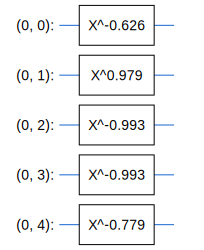

In [13]:
from cirq.contrib.svg import svg
from IPython.display import SVG

# Get the circuit and convert it to an SVG image
label_one_circuit = tfq.from_tensor(train_quantum_data)[y_train[:, 0] == 1][0]
circuit1 = (SVGCircuit(label_one_circuit))
with open('circuit1.png', 'w') as f:
    f.write(str(circuit1))

circuit1




Now  Constructs a quantum circuit in Cirq that performs a rotation of the qubit
    state on the Bloch sphere about the X, Y, and Z axes, with rotation angles
    given by the values in `symbols`.**bold text**

In [14]:
def make_rotation_circuit(bit, symbols):
    return cirq.Circuit(
        cirq.X(bit)**symbols[0],
        cirq.Y(bit)**symbols[1],
        cirq.Z(bit)**symbols[2])




In [15]:
def make_two_qubit_unitary_circuit(qubits, symbols):
    """
    Constructs a quantum circuit in Cirq that creates an arbitrary two-qubit
    unitary operation using the given rotation angles in `symbols`.
    """
    circuit = cirq.Circuit()
    circuit += make_rotation_circuit(qubits[0], symbols[0:3])
    circuit += make_rotation_circuit(qubits[1], symbols[3:6])
    circuit += [cirq.ZZ(*qubits)**symbols[6]]
    circuit += [cirq.YY(*qubits)**symbols[7]]
    circuit += [cirq.XX(*qubits)**symbols[8]]
    circuit += make_rotation_circuit(qubits[0], symbols[9:12])
    circuit += make_rotation_circuit(qubits[1], symbols[12:])
    return circuit

In [16]:
def generator(qubits, symbols, layer=1):
    circuit = cirq.Circuit()

    # Applies random rotations around the y-axis of the Bloch sphere to a list of qubits using the Ry gate in Cirq.
    num_qubits = len(qubits)
    random_angles = np.random.normal(loc=0, scale=np.pi/3, size=num_qubits // 2)
    for i in range(num_qubits // 2):
        circuit += cirq.ry(random_angles[i])(qubits[i])

    for i in range(layer):
    # Apply a unitary layer to the qubits
        for j, qubit in enumerate(qubits):
            # Compute the index range for the symbols associated with this qubit
            symbol_start_idx = 3*j + 3*i*len(qubits)
            symbol_end_idx = 3*(j+1) + 3*i*len(qubits)

            # Apply a rotation circuit to the qubit using the specified symbols
            rotation_circuit = make_rotation_circuit(qubit, symbols[symbol_start_idx:symbol_end_idx])
            circuit += rotation_circuit

        
        # entangling layer
        for j in range(len(qubits)):
            if j != (len(qubits)-1):
                circuit += cirq.CNOT(qubits[j], qubits[j+1])
            else:
                pass

    # Construct the final unitary for the data qubits
    final_unitary_symbols = symbols[-(3*int(len(qubits)/2)):]
    for i in range(int(len(qubits)/2)):
        circuit += make_rotation_circuit(qubits[i], final_unitary_symbols[3*i : 3*(i+1)])
    return circuit

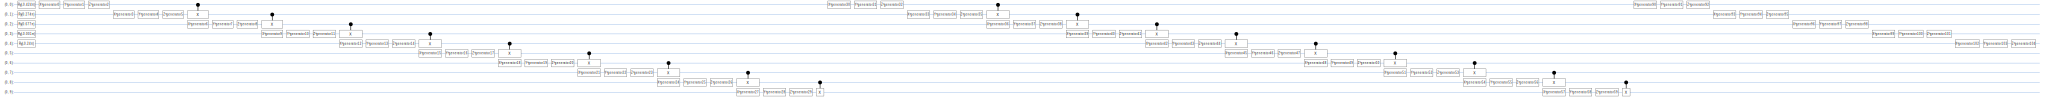

In [17]:
# params total: (3*features*2)*layer params + (3*features) final params
circuit3=SVGCircuit(generator(cirq.GridQubit.rect(1, 10), sympy.symbols('generator:105'), layer=2))
with open('circuit2.png', 'w') as f:
    f.write(str(circuit3))

circuit3

 Constructs a discriminator circuit in Cirq that applies a series of Hadamard
    gates to the data qubits, followed by a series of unitary and entangling layers
    that depend on the values in `symbols`, and a final unitary layer on the output
    qubits. The number of layers can be specified using the `layers` parameter.
    

In [18]:
def discriminator(data_qubits, output_qubits, symbols, layer=1):
    """
    Constructs a Cirq circuit for a quantum discriminator that performs a series
    of operations on the input `data_qubits` and output `output_qubits`, with the
    rotation angles determined by the values in `symbols`, and the number of
    layer specified by `layer`.
    """
    circuit = cirq.Circuit()

    # Hadamard layer for data qubits
    for qubit in data_qubits:
        circuit += cirq.H(qubit)

    # Apply unitary and entangling layer
    all_qubits = data_qubits + output_qubits
    for layer in range(layer):
        for i, qubit in enumerate(all_qubits):
            symbols_layer_i = symbols[3*i + 3*len(all_qubits)*layer : 3*(i+1) + 3*len(all_qubits)*layer]
            circuit += make_rotation_circuit(qubit, symbols_layer_i)

        for i in range(len(all_qubits) - 1):
            circuit += cirq.CNOT(all_qubits[i], all_qubits[i+1])

    # Apply final unitary for output qubits
    symbols_final_unitary = symbols[-(3*len(output_qubits)):]
    for i, qubit in enumerate(output_qubits):
        circuit += make_rotation_circuit(qubit, symbols_final_unitary[3*i : 3*(i+1)])

    return circuit


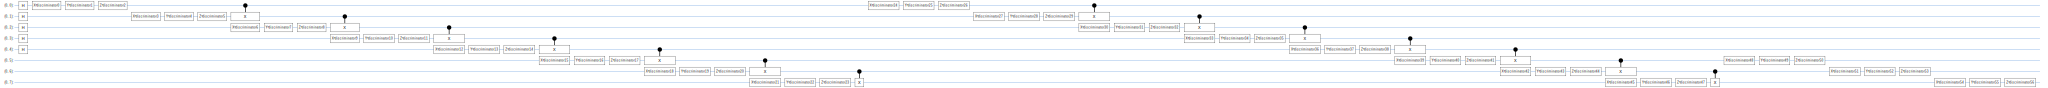

In [19]:
qubits = cirq.GridQubit.rect(1, 5+3)
# params total: (3 * (features + (total_number_of_class + 1)))*layer + 3*(total_number_of_class + 1) final params
circuit4=SVGCircuit(discriminator(qubits[0:5], qubits[5:], sympy.symbols('discriminator:57'), layer=2))
with open('circuit4.png', 'w') as f:
    f.write(str(circuit4))

circuit4

In [20]:
def create_gen_disc_circuit(symbols_gen, symbols_disc, qubits, total_number_of_features, total_number_of_class, generator_layers=1, discriminator_layers=1):
    """
    Constructs a quantum circuit in Cirq that combines a generator and a discriminator circuit.

    Args:
        symbols_gen (list): A list of symbols for the generator circuit.
        symbols_disc (list): A list of symbols for the discriminator circuit.
        qubits (list): A list of qubits used in the circuit.
        total_number_of_features (int): The number of input features.
        total_number_of_class (int): The number of output classes.
        generator_layers (int): The number of layers in the generator circuit. Default is 1.
        discriminator_layers (int): The number of layers in the discriminator circuit. Default is 1.

    Returns:
        A Cirq circuit that represents the generator and discriminator circuits combined.
    """
    # Create a circuit with the given qubits
    circuit = cirq.Circuit()
    # Create a list of qubits for the generator and discriminator circuits
    gen_qubits = qubits[:len(qubits)-(total_number_of_class+1)]
    disc_qubits = qubits[len(qubits)-(total_number_of_class+1):]

    # Add the generator circuit to the circuit
    gen_circuit = generator(gen_qubits, symbols_gen, layer=generator_layers)
    circuit += gen_circuit

    # Add the discriminator circuit to the circuit
    disc_circuit = discriminator(disc_qubits[:int(len(disc_qubits)/2)], disc_qubits[int(len(disc_qubits)/2):], symbols_disc, layer=discriminator_layers)
    circuit += disc_circuit

    return circuit


In [21]:
# model fix parameters
total_number_of_class = 2
total_number_of_features = 5
generator_layers = 4
discriminator_layers = 4


In [27]:
count_of_generator_par = (3*total_number_of_features*2)*generator_layers + (3*total_number_of_features)
count_of_discriminator_par = (3*(total_number_of_features + total_number_of_class + 1))*discriminator_layers + 3*(total_number_of_class + 1)

print(count_of_generator_par, count_of_discriminator_par)

135 105


In [28]:
# trainable parameters
symbols_gen = sympy.symbols('gen0:' + str(count_of_generator_par))
symbols_disc = sympy.symbols('disc0:' + str(count_of_discriminator_par))

# qubits
qgan_qubits = cirq.GridQubit.rect(1, total_number_of_features*2 + total_number_of_class + 1)

In [29]:
def calculate_discriminator_loss(y_true, y_pred, c_weight=0.5, epsilon=1e-10):
    """
    Computes the loss for a binary discriminator model that takes in a 2D input array
    of shape (batch_size, 3) and outputs a scalar value.

    The discriminator loss is a combination of binary cross-entropy loss for the
    discriminator output and categorical cross-entropy loss for the classifier output.
    The weight given to the categorical cross-entropy loss is controlled by the `c_weight`
    argument.

    Args:
        y_true (tf.Tensor): The true labels with shape (batch_size, 3).
        y_pred (tf.Tensor): The predicted labels with shape (batch_size, 3).
        c_weight (float): The weight given to the categorical cross-entropy loss.
        epsilon (float): A small value used for numerical stability.

    Returns:
        The combined loss value as a scalar tf.Tensor object.
    """
    d_true = (y_true[:, 2] + 1) / 2
    d_pred = (y_pred[:, 2] + 1) / 2

    d_loss = -1 * (tf.math.log(d_pred + epsilon) * d_true +
                   tf.math.log(1 - d_pred + epsilon) * (1 - d_true))
    d_loss = tf.reduce_mean(d_loss)

    c_true = (y_true[:, :2] + 1) / 2
    c_pred = (y_pred[:, :2] + 1) / 2

    d_true_size = tf.cast(tf.shape(tf.where(tf.equal(d_true, 1))), dtype=tf.float32)[0] + epsilon

    c_loss = tf.reduce_sum(tf.keras.losses.CategoricalCrossentropy(reduction='none')(c_true, c_pred) * d_true) / d_true_size

    return (1 - c_weight) * d_loss + c_weight * c_loss


In [23]:
@tf.function
def custom_acc(y_true, y_pred):
    """
    Computes a custom accuracy metric for a binary classification problem with
    two classes. The first two columns of the input tensors contain the real
    class probabilities, and the third column contains the binary label (+1 or -1).
    """
    y_true_bin = (y_true[:, 2] + 1) / 2  # convert binary labels to 0/1
    y_pred_bin = (y_pred[:, 2] + 1) / 2

    y_true_cls = tf.argmax(y_true[:, :2], axis=1)  # extract true class labels
    y_pred_cls = tf.argmax(y_pred[:, :2], axis=1)  # extract predicted class labels

    correct = tf.cast(y_true_cls == y_pred_cls, tf.float32) * y_true_bin

    num_positives = tf.cast(tf.size(tf.where(y_true_bin == 1)), dtype=tf.float32) + 1e-10
    acc = tf.reduce_sum(correct) / num_positives

    return acc


In [30]:
# discriminator model

def discriminator_model(weights_disc):
    disc_readout_operators = [cirq.Z(qgan_qubits[-(total_number_of_class+1) + q]) for q in range(total_number_of_class+1)]

    data_input = tf.keras.Input(shape=(), dtype=tf.dtypes.string)

    qdiscriminator_layers = tfq.layers.PQC(discriminator(qgan_qubits[:int((len(qgan_qubits)-(total_number_of_class+1))/2)],
                  qgan_qubits[len(qgan_qubits)-(total_number_of_class+1):], weights_disc, layer=discriminator_layers),
                  disc_readout_operators, name='qdiscriminator_layers')(data_input)

    quantum_disc_model = tf.keras.Model(inputs=[data_input], outputs=[qdiscriminator_layers])

    # Compile the model
    quantum_disc_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss=calculate_discriminator_loss,
                   metrics=[custom_acc]
                    )
    
    return quantum_disc_model





In [32]:
quantum_disc_model = discriminator_model(symbols_disc)

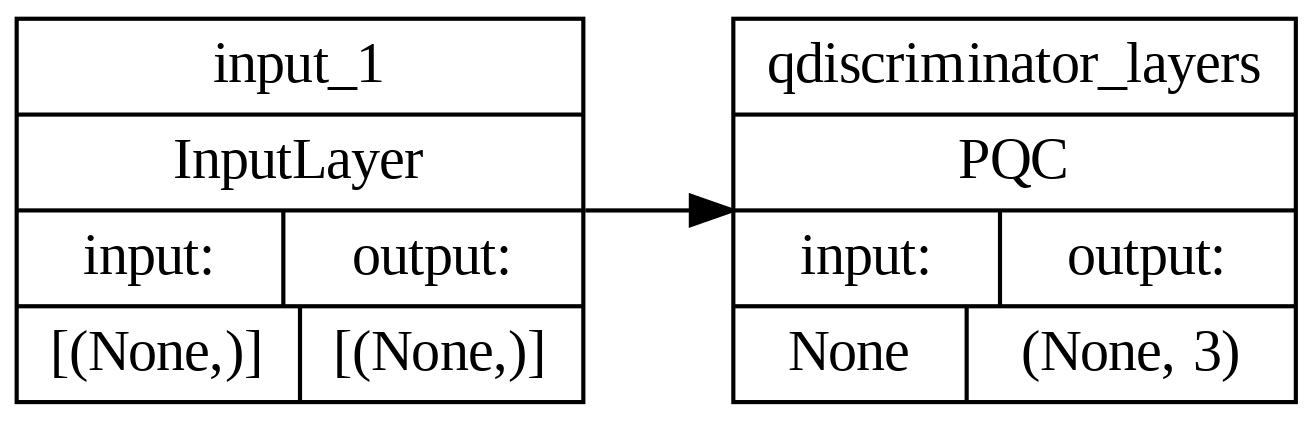

In [31]:
tf.keras.utils.plot_model(quantum_disc_model,show_shapes=True,show_layer_names=True,rankdir='LR',dpi=300,expand_nested=False,to_file='model_plot.png')


In [33]:
def gen_loss(y_true, y_pred):
    y_pred = (y_pred + 1)/2
    return tf.reduce_mean((-1)*tf.math.log(y_pred), axis=0)

In [34]:
# generator-discriminator pair model

def generator_model(symbols_gen, weights_disc):
    gen_readout_operators = cirq.Z(qgan_qubits[-1])

    data_input = tf.keras.Input(shape=(), dtype=tf.dtypes.string)

    qgenerator_layers = tfq.layers.PQC(create_gen_disc_circuit(symbols_gen, weights_disc,
                                  qgan_qubits, total_number_of_features, total_number_of_class, generator_layers=generator_layers, discriminator_layers=discriminator_layers),
                                  gen_readout_operators, name='qgenerator_layers')(data_input)

    quantum_gen_model = tf.keras.Model(inputs=[data_input], outputs=[qgenerator_layers])

    # Compile the model
    quantum_gen_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss=gen_loss)

    return quantum_gen_model



In [35]:
quantum_gen_model = generator_model(symbols_gen, quantum_disc_model.get_weights()[0])


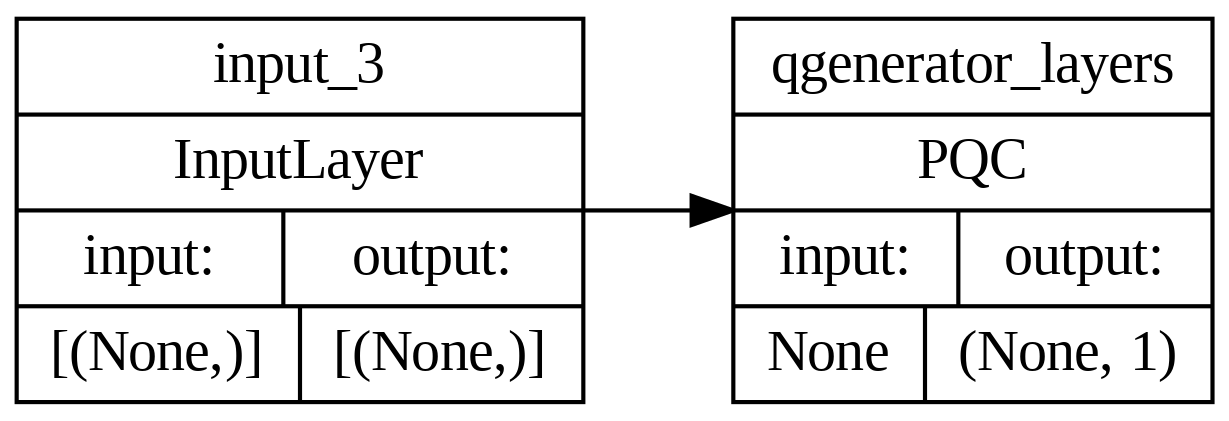

In [36]:
tf.keras.utils.plot_model(quantum_gen_model,show_shapes=True,show_layer_names=True,rankdir='LR',dpi=300,expand_nested=False,to_file='quantum_gen_model_plot.png')

In [37]:
import cirq

def generate_quantum_data(X):
    """
    Generate quantum data for a given dataset.
    
    :param X: input data as a list of samples
    :return: quantum data as a list of Cirq circuits
    """
    quantum_data = []
    # iterate through data samples
    for x in X:
        # create an empty circuit
        circuit = cirq.Circuit()
        # add quantum gates and operations to the circuit
        # ...
        # append the completed circuit to the list of quantum data
        quantum_data.append(circuit)

    return quantum_data


In [38]:
identity_data = tfq.convert_to_tensor(generate_quantum_data(x_train))
identity_label = np.zeros((len(identity_data),))

# Sanity check
print(len(identity_data), identity_label.shape)

100 (100,)


The generate_unique_fake_data() will generate fake quantum data using circuit

In [39]:
def generate_unique_fake_data(input_data, num_qubits, symbols, layer=1):
  

    # create an empty list to store the generated circuits
    quantum_circuits = []

    # iterate through input data
    for sample in input_data:

        # generate a quantum circuit using the generator function with the specified qubits, symbols, and number of layers
        circuit = generator(qubits[:2*len(sample)], symbols, layer=layer)

        # add the generated circuit to the list of quantum circuits
        quantum_circuits.append(circuit)

    # return the list of generated quantum circuits
    return quantum_circuits


We must produce the labels for the false quantum data once we have created the fake quantum data. Because the class labels are not necessary for false data, these labels may be constructed simply as an array of zeros. Because all of the samples are fraudulent, they will all receive a -1 for the fake/real label.

In [40]:
fake_data = tfq.convert_to_tensor(generate_unique_fake_data(x_train, qgan_qubits, quantum_gen_model.get_weights()[0], layer=generator_layers))
y_true_fake = np.zeros((len(fake_data), total_number_of_class+1))
y_true_fake[:, 2] += (-1)

y_true_fake.shape

(100, 3)

Now lets plot the fake quantum data circuit for the first two samples generated.

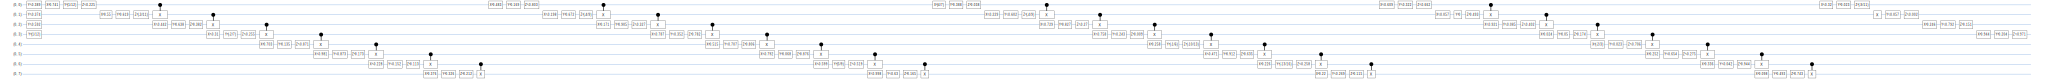

In [41]:
circuit5=SVGCircuit(tfq.from_tensor(fake_data)[0])
with open('circuit5.svg', 'w') as f:
    f.write(str(circuit5))

circuit5

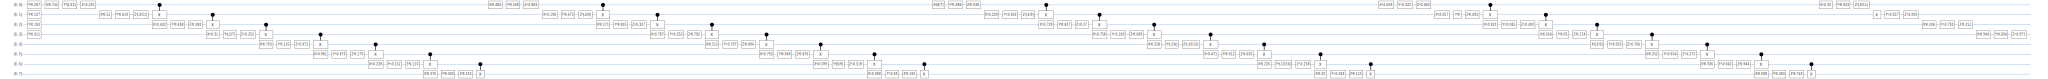

In [42]:
circuit6=SVGCircuit(tfq.from_tensor(fake_data)[1])
with open('circuit6.svg', 'w') as f:
    f.write(str(circuit6))

circuit6

# Train the Model

In [43]:
# Model initialization
qdisc_model = discriminator_model(symbols_disc)
qgen_model = generator_model(symbols_gen, qdisc_model.get_weights()[0])

In [44]:
def checkpoints(cycle):
    gen_model_cp = tf.keras.callbacks.ModelCheckpoint(
        filepath='./model_save/cp_generator_' + str(cycle) + '.h5',
        save_weights_only=True,
        monitor='loss',
        mode='min',
        save_best_only=True)

    disc_model_cp = tf.keras.callbacks.ModelCheckpoint(
        filepath='./model_save/cp_disc_' + str(cycle) + '.h5',
        save_weights_only=True,
        monitor='custom_accuracy',
        mode='max',
        save_best_only=True)
    
    return gen_model_cp, disc_model_cp

### Fit the Generator Model

In [45]:
def train_qgen(epochs, batch, verbose):
    history = quantum_gen_model.fit(x=identity_data,y=identity_label,batch_size=batch,epochs=epochs,verbose=verbose,callbacks=[generator_model])
    return history

### Fit the Discriminator Model

In [46]:
def train_qdisc(epochs, batch, verbose):
    history = quantum_disc_model.fit(x=gen_data_train,y=y_gen_train,batch_size=batch,epochs=epochs,verbose=verbose,callbacks=[disc_model_cp],validation_data=(gen_data_test, y_gen_test) )
    return history

In [47]:
w1 = quantum_disc_model.get_weights()[0]
w2 = quantum_gen_model.get_weights()[0]

In [48]:
# re-declare the generator model using the discriminator's weights
quantum_gen_model = generator_model(symbols_gen, quantum_disc_model.get_weights()[0])
generator_model, disc_model_cp = checkpoints(cycle=1)

In [ ]:
!mkdir model_save

In [ ]:
num_epochs = 1000
batch_size = 100
verbose = 1
H = train_qgen(num_epochs, batch_size, verbose)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6910
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6862
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6815
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6769
Epoch 5/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6725
Epoch 6/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6682
Epoch 7/1000
1/1 [==============================] - 4s 4s/step - loss: 0.6640
Epoch 8/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6600
Epoch 9/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6560
Epoch 10/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6522
Epoch 11/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6485
Epoch 12/1000
1/1 [==============================] - 3s 3s/step - loss: 0.6449
Epoch 13/1000
1/1 [==============================] - 4s 4s/st

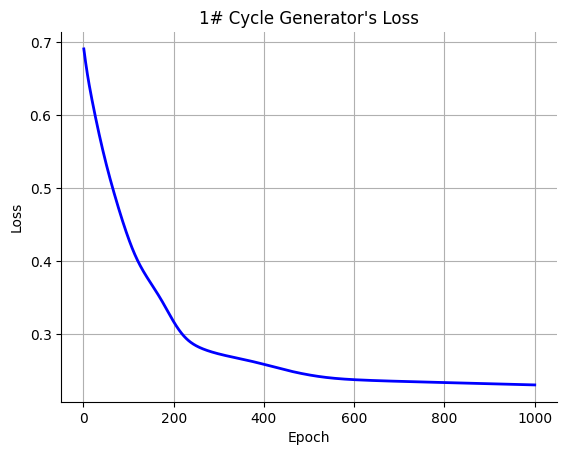

In [ ]:
import matplotlib.pyplot as plt

# Get the data
loss = H.history['loss']
epochs = range(1, len(loss) + 1)

# Customize the plot
fig, ax = plt.subplots()
ax.plot(epochs, loss, color='blue', linestyle='-', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title("1# Cycle Generator's Loss")
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


We can observe that the loss value decreases throughout training, indicating that the generator effectively deceive the discriminator.

In [ ]:


gen_data_train = tfq.convert_to_tensor(generate_data(x_train, qgan_qubits) + generate_unique_fake_data(x_train, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))
gen_data_test = tfq.convert_to_tensor(generate_data(x_test, qgan_qubits) + generate_unique_fake_data(x_test, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)

print(len(gen_data_train), len(gen_data_test))
print(y_gen_train.shape, y_gen_test.shape)

200 200
(200, 3) (200, 3)


In [ ]:
# Fit the Discriminator Model
H = train_qdisc(200, 64, 1)

Epoch 1/200
4/4 [==============================] - 8s 2s/step - loss: 0.7191 - custom_accuracy: 0.7197 - val_loss: 0.5548 - val_custom_accuracy: 0.3511
Epoch 2/200
4/4 [==============================] - 5s 1s/step - loss: 0.7172 - custom_accuracy: 0.6523 - val_loss: 0.5516 - val_custom_accuracy: 0.3511
Epoch 3/200
4/4 [==============================] - 4s 1000ms/step - loss: 0.7096 - custom_accuracy: 0.6473 - val_loss: 0.5488 - val_custom_accuracy: 0.3763
Epoch 4/200
4/4 [==============================] - 4s 1s/step - loss: 0.7010 - custom_accuracy: 0.6631 - val_loss: 0.5457 - val_custom_accuracy: 0.3559
Epoch 5/200
4/4 [==============================] - 7s 2s/step - loss: 0.7058 - custom_accuracy: 0.6330 - val_loss: 0.5427 - val_custom_accuracy: 0.3559
Epoch 6/200
4/4 [==============================] - 5s 1s/step - loss: 0.6956 - custom_accuracy: 0.6420 - val_loss: 0.5403 - val_custom_accuracy: 0.3559
Epoch 7/200
4/4 [==============================] - 4s 1s/step - loss: 0.6861 - custo

<ipython-input-52-c3a1e95b5c0a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


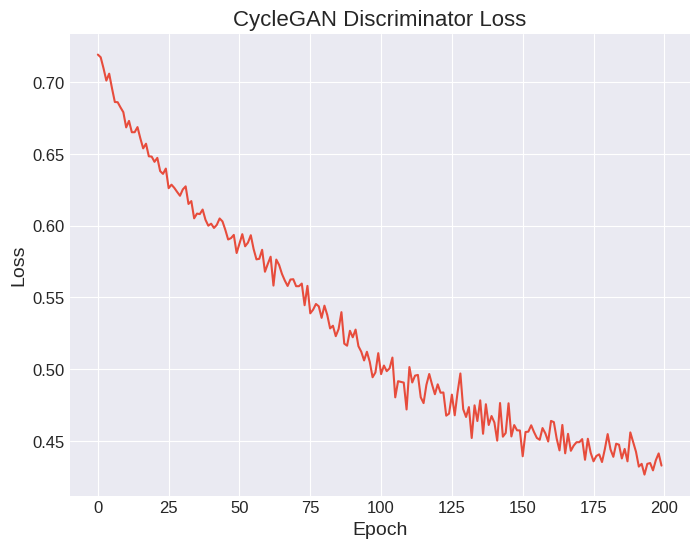

In [ ]:
import matplotlib.pyplot as plt

# Define the style of the plot
plt.style.use('seaborn-darkgrid')

# Create a new figure with custom size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the loss data with a specific color and linestyle
ax.plot(H.history['loss'], color='#E74C3C', linestyle='-')

# Add labels and title to the plot
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.set_title("CycleGAN Discriminator Loss", fontsize=16)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12)

# Show the plot
plt.show()


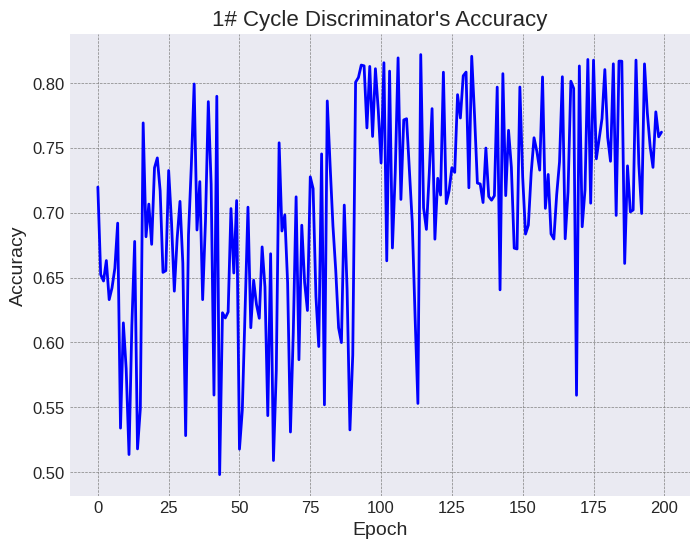

In [ ]:
import matplotlib.pyplot as plt

# set the figure size
fig = plt.figure(figsize=(8,6))

# plot the data
plt.plot(H.history['custom_accuracy'], color='blue', linewidth=2)

# set the axis labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title("1# Cycle Discriminator's Accuracy", fontsize=16)

# customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# customize the grid
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# show the plot
plt.show()


In [ ]:
custom_acc(np.array(y_gen_test, dtype=np.float32), qdisc_model.predict(gen_data_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.71>

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(symbols_gen, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('qdisc_layer').set_weights([best_qdisc_weights])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=2)

In [ ]:
# Fit the Generator Model
H = train_qgen(1000, 100, 1)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.2767
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2767
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2767
Epoch 4/1000
1/1 [==============================] - 3s 3s/step - loss: 0.2767
Epoch 5/1000
1/1 [==============================] - 8s 8s/step - loss: 0.2767
Epoch 6/1000
1/1 [==============================] - 8s 8s/step - loss: 0.2767
Epoch 7/1000
1/1 [==============================] - 5s 5s/step - loss: 0.2767
Epoch 8/1000
1/1 [==============================] - 8s 8s/step - loss: 0.2767
Epoch 9/1000
1/1 [==============================] - 7s 7s/step - loss: 0.2767
Epoch 10/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2767
Epoch 11/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2767
Epoch 12/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2767
Epoch 13/1000
1/1 [==============================] - 2s 2s/st

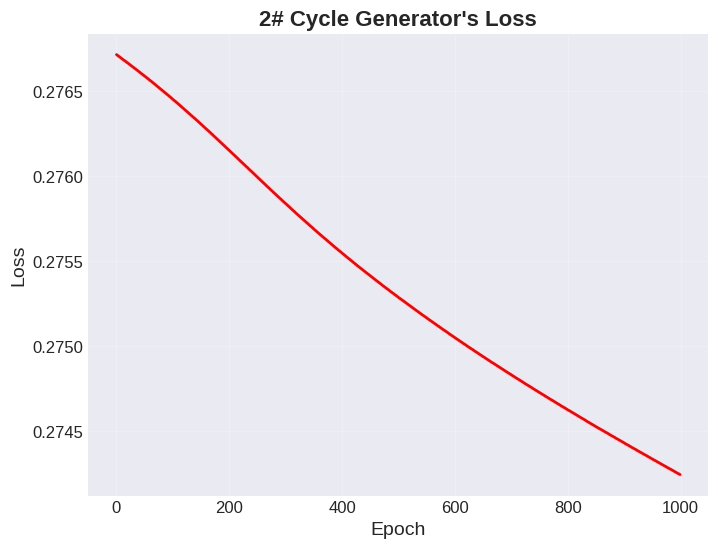

In [ ]:
import matplotlib.pyplot as plt

# Get the data for the plot
loss = H.history['loss']

# Set the figure size and create the plot
plt.figure(figsize=(8,6))
plt.plot(loss, color='red', linewidth=2)

# Set the title and axis labels
plt.title("2# Cycle Generator's Loss", fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Customize the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid lines
plt.grid(alpha=0.2)

# Show the plot
plt.show()


In [ ]:
# Generate Real + Fake Data

gen_data_train = tfq.convert_to_tensor(generate_data(x_train, qgan_qubits) + generate_unique_fake_data(x_train, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))
gen_data_test = tfq.convert_to_tensor(generate_data(x_test, qgan_qubits) + generate_unique_fake_data(x_test, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)

print(len(gen_data_train), len(gen_data_test))
print(y_gen_train.shape, y_gen_test.shape)

200 200
(200, 3) (200, 3)


In [ ]:
# Fit the Discriminator Model
H = train_qdisc(250, 64, 1)

Epoch 1/250
4/4 [==============================] - 5s 1s/step - loss: 0.4444 - custom_accuracy: 0.7559 - val_loss: 0.4466 - val_custom_accuracy: 0.3442
Epoch 2/250
4/4 [==============================] - 4s 1s/step - loss: 0.4359 - custom_accuracy: 0.7049 - val_loss: 0.4469 - val_custom_accuracy: 0.3442
Epoch 3/250
4/4 [==============================] - 5s 1s/step - loss: 0.4340 - custom_accuracy: 0.7323 - val_loss: 0.4474 - val_custom_accuracy: 0.3442
Epoch 4/250
4/4 [==============================] - 7s 2s/step - loss: 0.4467 - custom_accuracy: 0.7319 - val_loss: 0.4481 - val_custom_accuracy: 0.3442
Epoch 5/250
4/4 [==============================] - 4s 1s/step - loss: 0.4367 - custom_accuracy: 0.8168 - val_loss: 0.4487 - val_custom_accuracy: 0.3442
Epoch 6/250
4/4 [==============================] - 4s 998ms/step - loss: 0.4468 - custom_accuracy: 0.6839 - val_loss: 0.4493 - val_custom_accuracy: 0.3442
Epoch 7/250
4/4 [==============================] - 6s 2s/step - loss: 0.4468 - custom

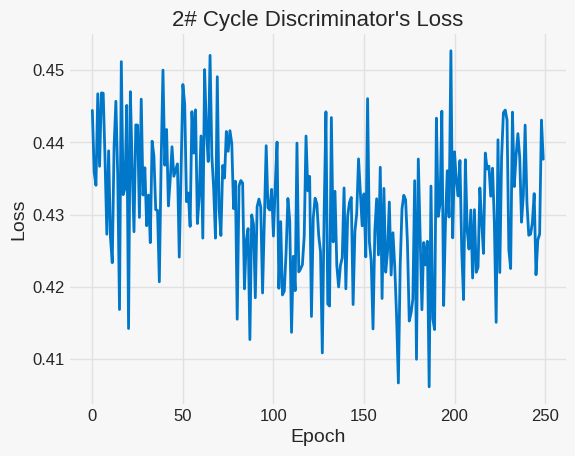

In [ ]:
import matplotlib.pyplot as plt

# Define colors for the graph
line_color = '#0077c8'
bg_color = '#f7f7f7'

# Create the figure and axes objects
fig, ax = plt.subplots()

# Set the background color of the plot area
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Plot the loss data
ax.plot(H.history['loss'], color=line_color, linewidth=2)

# Set the axis labels and title
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.set_title("2# Cycle Discriminator's Loss", fontsize=16)

# Customize the tick labels
ax.tick_params(axis='both', which='major', labelsize=12, color=line_color)
ax.tick_params(axis='both', which='minor', labelsize=10, color=line_color)

# Customize the grid lines
ax.grid(color='#e1e1e1', linestyle='-', linewidth=1)

# Show the plot
plt.show()


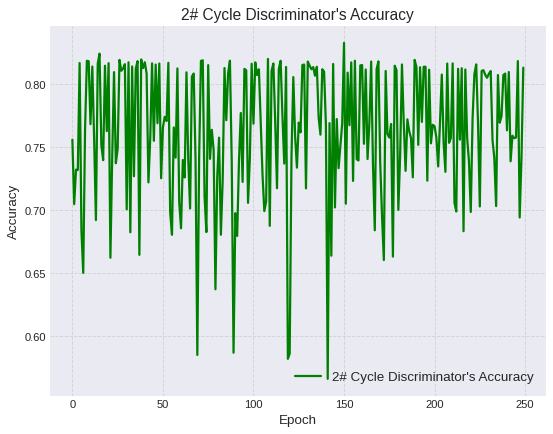

In [ ]:
import matplotlib.pyplot as plt

# Define the figure size and dpi
fig = plt.figure(figsize=(8, 6), dpi=80)

# Plot the data
plt.plot(H.history['custom_accuracy'], color='green', linewidth=2, label="2# Cycle Discriminator's Accuracy")

# Add title, axis labels and legend
plt.title("2# Cycle Discriminator's Accuracy", fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)

# Customize the tick labels and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='lightgrey', linestyle='--')

# Show the plot
plt.show()


In [ ]:
custom_acc(np.array(y_gen_test, dtype=np.float32), qdisc_model.predict(gen_data_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.71>

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(symbols_gen, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('qdisc_layer').set_weights([best_qdisc_weights])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=3)

In [ ]:
# Fit the Generator Model
H = train_qgen(500, 100, 1)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.6238
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 0.6188
Epoch 3/500
1/1 [==============================] - 2s 2s/step - loss: 0.6139
Epoch 4/500
1/1 [==============================] - 4s 4s/step - loss: 0.6092
Epoch 5/500
1/1 [==============================] - 4s 4s/step - loss: 0.6047
Epoch 6/500
1/1 [==============================] - 2s 2s/step - loss: 0.6003
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 0.5960
Epoch 8/500
1/1 [==============================] - 2s 2s/step - loss: 0.5919
Epoch 9/500
1/1 [==============================] - 2s 2s/step - loss: 0.5878
Epoch 10/500
1/1 [==============================] - 2s 2s/step - loss: 0.5838
Epoch 11/500
1/1 [==============================] - 4s 4s/step - loss: 0.5798
Epoch 12/500
1/1 [==============================] - 4s 4s/step - loss: 0.5759
Epoch 13/500
1/1 [==============================] - 2s 2s/step - loss: 0.

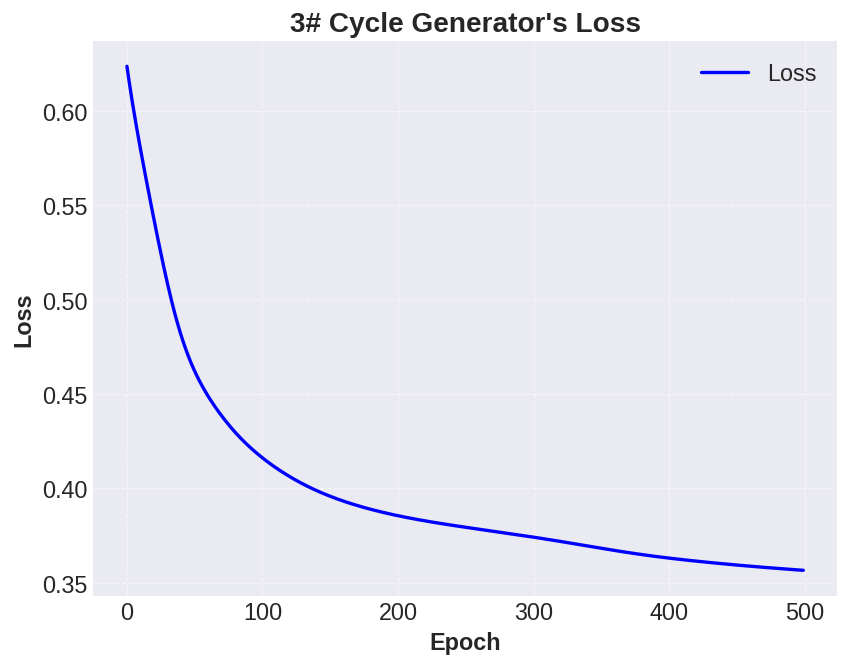

In [ ]:
import matplotlib.pyplot as plt

# Define the figure size and resolution
fig = plt.figure(figsize=(8, 6), dpi=120)

# Set the font size for the labels
plt.rcParams.update({'font.size': 14})

# Plot the loss values
plt.plot(H.history['loss'], color='blue', linewidth=2)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Set the x and y axis labels and title
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.title("3# Cycle Generator's Loss", fontweight='bold')

# Add a legend
plt.legend(['Loss'], loc='upper right')

# Show the plot
plt.show()


In [ ]:
# Generate Real + Fake Data

gen_data_train = tfq.convert_to_tensor(generate_data(x_train, qgan_qubits) + generate_unique_fake_data(x_train, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))
gen_data_test = tfq.convert_to_tensor(generate_data(x_test, qgan_qubits) + generate_unique_fake_data(x_test, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)

print(len(gen_data_train), len(gen_data_test))
print(y_gen_train.shape, y_gen_test.shape)

200 200
(200, 3) (200, 3)


In [ ]:
# Change the C_weight
C_weight = 0.8

In [ ]:
# Fit the Discriminator Model
H = train_qdisc(250, 64, 1)

Epoch 1/250
4/4 [==============================] - 4s 1s/step - loss: 0.4429 - custom_accuracy: 0.7392 - val_loss: 0.4437 - val_custom_accuracy: 0.3442
Epoch 2/250
4/4 [==============================] - 7s 2s/step - loss: 0.4421 - custom_accuracy: 0.7789 - val_loss: 0.4439 - val_custom_accuracy: 0.3442
Epoch 3/250
4/4 [==============================] - 5s 1s/step - loss: 0.4410 - custom_accuracy: 0.7322 - val_loss: 0.4437 - val_custom_accuracy: 0.3442
Epoch 4/250
4/4 [==============================] - 4s 1s/step - loss: 0.4486 - custom_accuracy: 0.8146 - val_loss: 0.4434 - val_custom_accuracy: 0.3442
Epoch 5/250
4/4 [==============================] - 5s 1s/step - loss: 0.4371 - custom_accuracy: 0.7547 - val_loss: 0.4438 - val_custom_accuracy: 0.3442
Epoch 6/250
4/4 [==============================] - 7s 2s/step - loss: 0.4388 - custom_accuracy: 0.7017 - val_loss: 0.4439 - val_custom_accuracy: 0.3442
Epoch 7/250
4/4 [==============================] - 7s 2s/step - loss: 0.4318 - custom_ac

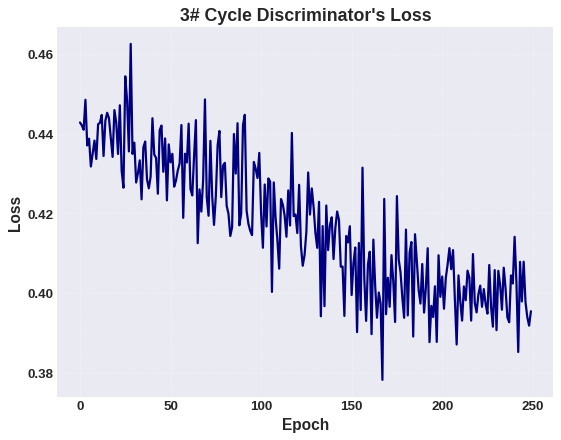

In [ ]:
import matplotlib.pyplot as plt

# Define figure size and dpi
fig = plt.figure(figsize=(8,6), dpi=80)

# Plot the loss curve
plt.plot(H.history['loss'], linewidth=2, color='navy')

# Set the axis labels and title
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.title("3# Cycle Discriminator's Loss", fontsize=16, fontweight='bold')

# Customize the tick labels and grid
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(linestyle='dotted', alpha=0.5)

# Show the plot
plt.show()


<ipython-input-73-7f91d6975e76>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


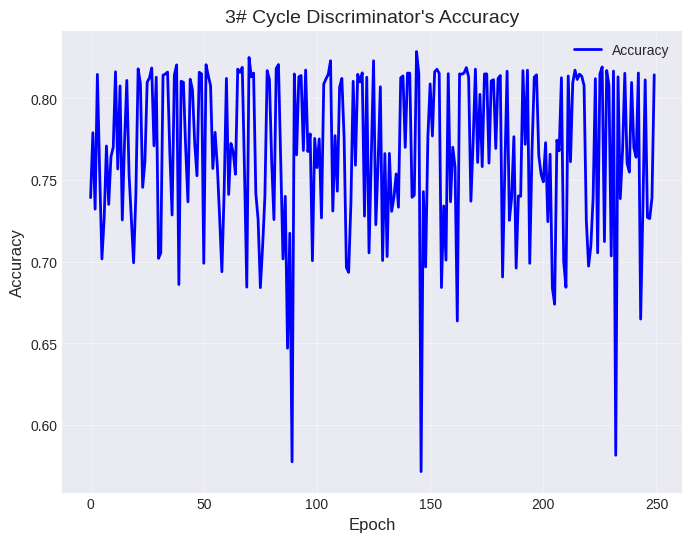

In [ ]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-darkgrid')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
ax.plot(H.history['custom_accuracy'], color='blue', linewidth=2)

# Add labels and title
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title("3# Cycle Discriminator's Accuracy", fontsize=14)

# Set the tick size and font size
ax.tick_params(axis='both', labelsize=10)

# Add grid lines and legend
ax.grid(alpha=0.4)
ax.legend(['Accuracy'], fontsize=10)

# Show the plot
plt.show()


In [ ]:
custom_acc(np.array(y_gen_test, dtype=np.float32), qdisc_model.predict(gen_data_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.71>

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(symbols_gen, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('qdisc_layer').set_weights([best_qdisc_weights])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=4)

In [ ]:
# Fit the Generator Model
H = train_qgen(150, 100, 1)

Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.6619
Epoch 2/150
1/1 [==============================] - 2s 2s/step - loss: 0.6565
Epoch 3/150
1/1 [==============================] - 2s 2s/step - loss: 0.6512
Epoch 4/150
1/1 [==============================] - 4s 4s/step - loss: 0.6459
Epoch 5/150
1/1 [==============================] - 4s 4s/step - loss: 0.6407
Epoch 6/150
1/1 [==============================] - 2s 2s/step - loss: 0.6356
Epoch 7/150
1/1 [==============================] - 2s 2s/step - loss: 0.6306
Epoch 8/150
1/1 [==============================] - 2s 2s/step - loss: 0.6258
Epoch 9/150
1/1 [==============================] - 2s 2s/step - loss: 0.6211
Epoch 10/150
1/1 [==============================] - 3s 3s/step - loss: 0.6165
Epoch 11/150
1/1 [==============================] - 4s 4s/step - loss: 0.6122
Epoch 12/150
1/1 [==============================] - 4s 4s/step - loss: 0.6080
Epoch 13/150
1/1 [==============================] - 2s 2s/step - loss: 0.

<ipython-input-78-5ac7956f0154>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


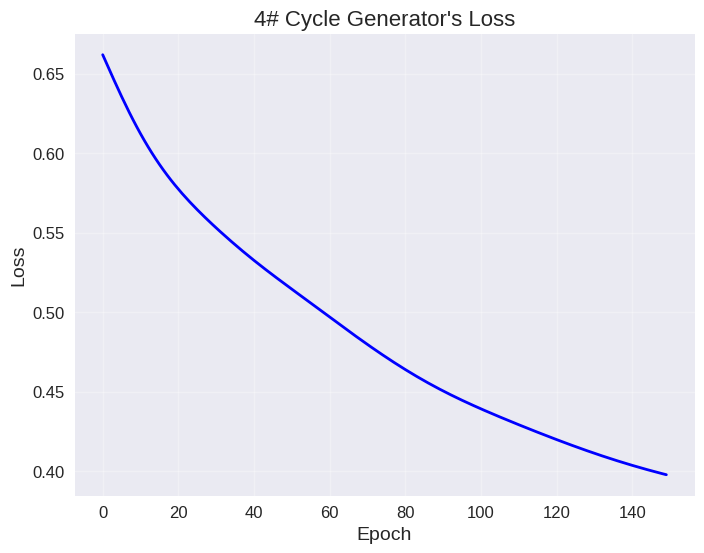

In [ ]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn')

# Create a figure object and set the figure size
fig = plt.figure(figsize=(8, 6))

# Plot the loss values
plt.plot(H.history['loss'], linewidth=2, color='blue')

# Set the x-axis and y-axis labels
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Set the title of the plot
plt.title("4# Cycle Generator's Loss", fontsize=16)

# Customize the tick marks and grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [ ]:
# Generate Real + Fake Data

gen_data_train = tfq.convert_to_tensor(generate_data(x_train, qgan_qubits) + generate_unique_fake_data(x_train, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))
gen_data_test = tfq.convert_to_tensor(generate_data(x_test, qgan_qubits) + generate_unique_fake_data(x_test, qgan_qubits, qgen_model.get_weights()[0], layer=gen_layer))

y_gen_train = np.concatenate((y_train, y_true_fake), axis = 0)
y_gen_test = np.concatenate((y_test, y_true_fake), axis = 0)

print(len(gen_data_train), len(gen_data_test))
print(y_gen_train.shape, y_gen_test.shape)

200 200
(200, 3) (200, 3)


In [ ]:
# Change the C_weight
C_weight = 0.95

In [ ]:
# Fit the Discriminator Model
H = train_qdisc(250, 64, 1)

Epoch 1/250
4/4 [==============================] - 6s 1s/step - loss: 0.4177 - custom_accuracy: 0.8030 - val_loss: 0.4060 - val_custom_accuracy: 0.3442
Epoch 2/250
4/4 [==============================] - 4s 1s/step - loss: 0.3898 - custom_accuracy: 0.7333 - val_loss: 0.4055 - val_custom_accuracy: 0.3442
Epoch 3/250
4/4 [==============================] - 4s 1s/step - loss: 0.3981 - custom_accuracy: 0.8116 - val_loss: 0.4053 - val_custom_accuracy: 0.3442
Epoch 4/250
4/4 [==============================] - 7s 2s/step - loss: 0.3928 - custom_accuracy: 0.6699 - val_loss: 0.4051 - val_custom_accuracy: 0.3442
Epoch 5/250
4/4 [==============================] - 5s 1s/step - loss: 0.3881 - custom_accuracy: 0.8042 - val_loss: 0.4047 - val_custom_accuracy: 0.3442
Epoch 6/250
4/4 [==============================] - 4s 983ms/step - loss: 0.3971 - custom_accuracy: 0.7796 - val_loss: 0.4038 - val_custom_accuracy: 0.3442
Epoch 7/250
4/4 [==============================] - 4s 1s/step - loss: 0.3988 - custom

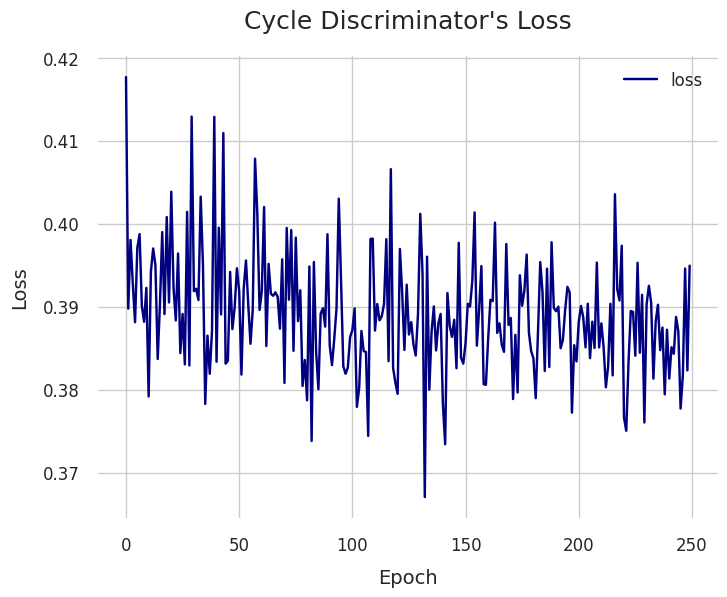

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # set the style of the plot

# create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# plot the loss values
ax.plot(H.history['loss'], color='navy')

# set the labels and title
ax.set_xlabel('Epoch', fontsize=14, labelpad=10)
ax.set_ylabel('Loss', fontsize=14, labelpad=10)
ax.set_title("Cycle Discriminator's Loss", fontsize=18, pad=20)

# customize the ticks
ax.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5)
ax.tick_params(axis='both', which='minor', labelsize=12, length=4, width=1)

# remove the spines on the top and right sides
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add a legend
ax.legend(['loss'], loc='upper right', fontsize=12)

# display the plot
plt.show()


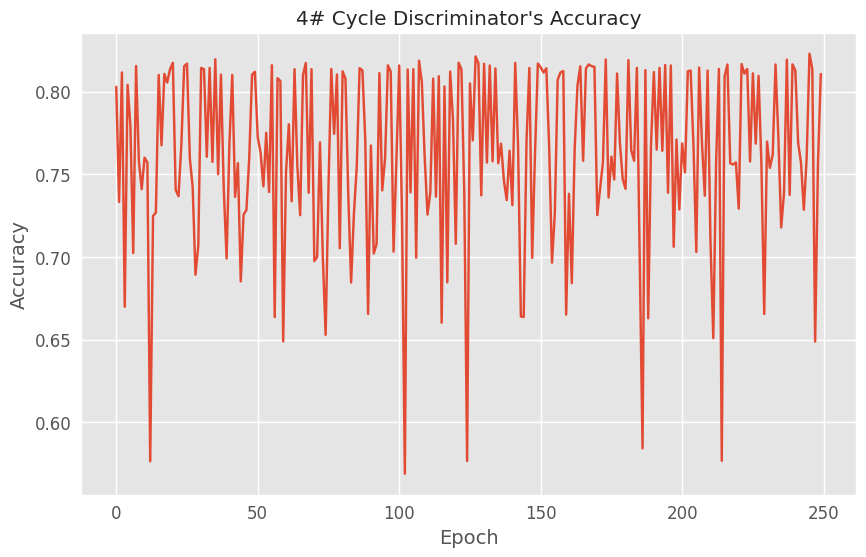

In [ ]:
plt.plot(H.history['custom_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("4# Cycle Discriminator's Accuracy")
plt.show()

In [ ]:
custom_accuracy(np.array(y_gen_test, dtype=np.float32), qdisc_model.predict(gen_data_test))

<tf.Tensor: shape=(), dtype=float32, numpy=0.71>

## Fifth Cycle

In [ ]:
best_qdisc_weights = qdisc_model.get_weights()[0]
best_qgen_weights = qgen_model.get_weights()[0]
qgen_model = generator_model(symbols_gen, qdisc_model.get_weights()[0])

qgen_model.get_layer('qgen_layer').set_weights([best_qgen_weights])
qdisc_model.get_layer('qdisc_layer').set_weights([best_qdisc_weights])

In [ ]:
gen_model_cp, disc_model_cp = checkpoints(cycle=5)

In [ ]:
C_weight = 1.0

In [ ]:
# Fit the Discriminator Model
history = qdisc_model.fit(x=train_quantum_data,y=y_train,batch_size=32,epochs=250,verbose=1,callbacks=[disc_model_cp],validation_data=(test_quantum_data, y_test))

Epoch 1/250
4/4 [==============================] - 1s 376ms/step - loss: 0.4749 - custom_accuracy: 0.7031 - val_loss: 0.4899 - val_custom_accuracy: 0.7734
Epoch 2/250
4/4 [==============================] - 1s 333ms/step - loss: 0.4576 - custom_accuracy: 0.7031 - val_loss: 0.4659 - val_custom_accuracy: 0.7734
Epoch 3/250
4/4 [==============================] - 1s 327ms/step - loss: 0.4322 - custom_accuracy: 0.7578 - val_loss: 0.4391 - val_custom_accuracy: 0.7734
Epoch 4/250
4/4 [==============================] - 1s 329ms/step - loss: 0.4062 - custom_accuracy: 0.7578 - val_loss: 0.4139 - val_custom_accuracy: 0.7734
Epoch 5/250
4/4 [==============================] - 1s 332ms/step - loss: 0.3820 - custom_accuracy: 0.8125 - val_loss: 0.3928 - val_custom_accuracy: 0.7734
Epoch 6/250
4/4 [==============================] - 1s 326ms/step - loss: 0.3613 - custom_accuracy: 0.8125 - val_loss: 0.3750 - val_custom_accuracy: 0.7734
Epoch 7/250
4/4 [==============================] - 1s 213ms/step - los

In [ ]:
# Fit the Discriminator Model for another 250 epochs
history = qdisc_model.fit(x=train_quantum_data,
                          y=y_train,
                          batch_size=32,
                          epochs=250,
                          verbose=1,
                          callbacks=[disc_model_cp],
                          validation_data=(test_quantum_data, y_test)
                          )

Epoch 1/250
4/4 [==============================] - 1s 211ms/step - loss: 0.2723 - custom_accuracy: 0.7578 - val_loss: 0.3022 - val_custom_accuracy: 0.7734
Epoch 2/250
4/4 [==============================] - 1s 199ms/step - loss: 0.2722 - custom_accuracy: 0.8125 - val_loss: 0.3022 - val_custom_accuracy: 0.7734
Epoch 3/250
4/4 [==============================] - 1s 359ms/step - loss: 0.2722 - custom_accuracy: 0.8125 - val_loss: 0.3019 - val_custom_accuracy: 0.7734
Epoch 4/250
4/4 [==============================] - 1s 364ms/step - loss: 0.2722 - custom_accuracy: 0.6484 - val_loss: 0.3017 - val_custom_accuracy: 0.7734
Epoch 5/250
4/4 [==============================] - 1s 333ms/step - loss: 0.2723 - custom_accuracy: 0.7578 - val_loss: 0.3015 - val_custom_accuracy: 0.7734
Epoch 6/250
4/4 [==============================] - 1s 340ms/step - loss: 0.2723 - custom_accuracy: 0.7578 - val_loss: 0.3013 - val_custom_accuracy: 0.7734
Epoch 7/250
4/4 [==============================] - 1s 333ms/step - los

In [ ]:
# Fit the Discriminator Model for another 500 epochs
history = qdisc_model.fit(x=train_quantum_data,
                          y=y_train,
                          batch_size=32,
                          epochs=500,
                          verbose=1,
                          callbacks=[disc_model_cp],
                          validation_data=(test_quantum_data, y_test)
                          )

Epoch 1/500
4/4 [==============================] - 1s 357ms/step - loss: 0.2722 - custom_accuracy: 0.7578 - val_loss: 0.3004 - val_custom_accuracy: 0.7734
Epoch 2/500
4/4 [==============================] - 1s 366ms/step - loss: 0.2720 - custom_accuracy: 0.7578 - val_loss: 0.3010 - val_custom_accuracy: 0.7734
Epoch 3/500
4/4 [==============================] - 1s 339ms/step - loss: 0.2716 - custom_accuracy: 0.7578 - val_loss: 0.3019 - val_custom_accuracy: 0.7734
Epoch 4/500
4/4 [==============================] - 1s 340ms/step - loss: 0.2716 - custom_accuracy: 0.7031 - val_loss: 0.3025 - val_custom_accuracy: 0.7734
Epoch 5/500
4/4 [==============================] - 1s 334ms/step - loss: 0.2715 - custom_accuracy: 0.8125 - val_loss: 0.3023 - val_custom_accuracy: 0.7734
Epoch 6/500
4/4 [==============================] - 1s 353ms/step - loss: 0.2715 - custom_accuracy: 0.6484 - val_loss: 0.3023 - val_custom_accuracy: 0.7734
Epoch 7/500
4/4 [==============================] - 1s 260ms/step - los

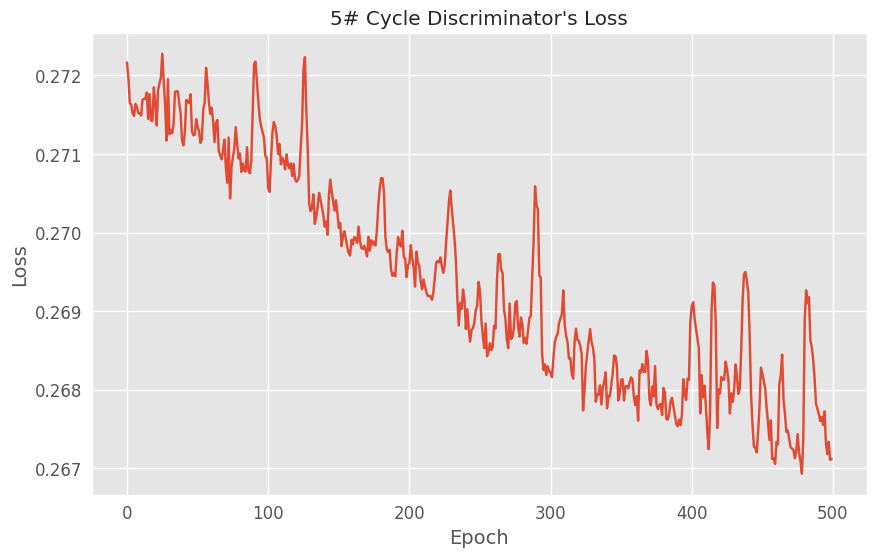

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("5# Cycle Discriminator's Loss")
plt.show()

In [ ]:
qdisc_model.save_weights('./model_save/disc_final.h5')
qgen_model.save_weights('./model_save/gen_final.h5')

In [ ]:
qdisc_model.load_weights('./model_save/disc_final.h5')

In [ ]:
from sklearn.metrics import roc_auc_score

print("Training Accuracy:", custom_acc(np.array(y_train, dtype=np.float32), qdisc_model.predict(train_quantum_data)).numpy())
print("Testing Accuracy", custom_acc(np.array(y_test, dtype=np.float32), qdisc_model.predict(test_quantum_data)).numpy())

print("Training AUC:", roc_auc_score(np.argmax(((y_train+1)/2)[:, :2], axis=1), (((qdisc_model.predict(train_quantum_data)+1)/2)[:, :2])[:, 1]))
print("Testing AUC:", roc_auc_score(np.argmax(((y_test+1)/2)[:, :2], axis=1), (((qdisc_model.predict(test_quantum_data)+1)/2)[:, :2])[:, 1]))

Training Accuracy: 0.76
Testing Accuracy 0.71
Training AUC: 0.8496
Testing AUC: 0.7824


This project proposes and trains a QGAN architecture. At the completion of the training procedure, the discriminator had 0.76 training accuracy and 0.71 testing accuracy, as well as 0.8496 training AUC and 0.7824 testing AUC. Because there are so many moving pieces in a QGAN architecture, choosing the proper parameters and regulating the adversarial game are the most difficult portions of training a QGAN model. While the ansatz is fixed in this project, evaluating a fresh ansatz for both the generator and discriminator may result in improved performance in the future.

In [ ]:
from google.colab import files
files.download("/content/model_save.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>